## TIME SERIES ANALYSIS ON CORONAVIRUS FOR THE NETHERLANDS THROUGH DAILY UPDATED DATASET

*This notebook is scraping yesterday's dataset from ECDC website.

In [21]:
import pandas as pd
import requests
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
#This part is for update the dataset.


yesterday = date.today() - timedelta(days=1)
yesterday1 = yesterday.strftime('%Y-%m-%d')


url=f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{yesterday1}.xlsx'
df = pd.read_excel(url, parse_date=[0],index_col=0)#Parsing date is for time series analysis  


df.columns = ['Day','Month','Year','Cases','Deaths','Countries and territories','Geold']


df.drop('Day',1,inplace=True)
df.drop('Month',1,inplace=True)
df.drop('Year',1,inplace=True)
df.drop('Countries and territories',1,inplace=True)
df_NL = df[df['Geold'] == 'NL']
df_NL.drop('Geold',1,inplace=True)
df_NL.drop(df_NL.tail(1).index,inplace=True) # drop last row 31-12-2019



df_NL.head(10)


,Cases,Deaths
DateRep,,
2020-03-22,637,30
2020-03-21,534,30
2020-03-20,409,18
2020-03-19,346,34
2020-03-18,292,0
2020-03-17,278,4
2020-03-16,176,8
2020-03-15,155,7
2020-03-14,190,0


In [23]:
df_NL.tail(10)

,Cases,Deaths
DateRep,,
2020-01-10,0,0
2020-01-09,0,0
2020-01-08,0,0
2020-01-07,0,0
2020-01-06,0,0
2020-01-05,0,0
2020-01-04,0,0
2020-01-03,0,0
2020-01-02,0,0


In [24]:
type(df.index[0]) #Checking the dates whether they are timestamp or not.

pandas._libs.tslibs.timestamps.Timestamp

In [25]:
df_NL.shape

(82, 2)

In [26]:
df_NL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82 entries, 2020-03-22 to 2020-01-01
Data columns (total 2 columns):
Cases     82 non-null int64
Deaths    82 non-null int64
dtypes: int64(2)
memory usage: 1.9 KB


In [27]:
df_NL.isnull().sum()

Cases     0
Deaths    0
dtype: int64

In [28]:
df_NL.describe()

,Cases,Deaths
count,82.000000,82.000000
mean,44.280488,1.658537
std,117.508946,6.275997
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,5.000000,0.000000
max,637.000000,34.000000


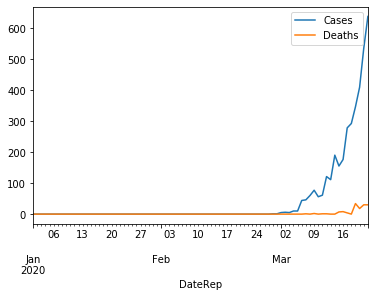

In [29]:
df_NL.resample('D').mean().plot()

136


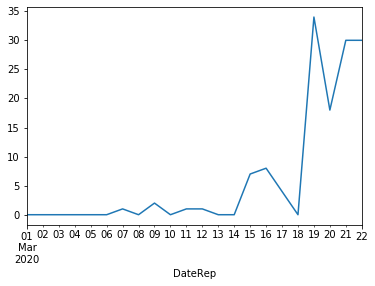

In [18]:
print(df_NL['Deaths'].sum())
df_NL.Deaths['2020-03'].resample('D').mean().plot()

Cases     3629
Deaths     136
dtype: int64


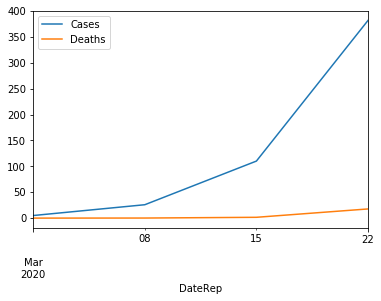

In [19]:
print(df_NL['2020-03'].sum())

df_NL['2020-03'].resample('W').mean().plot()

Cases     3629
Deaths     136
dtype: int64


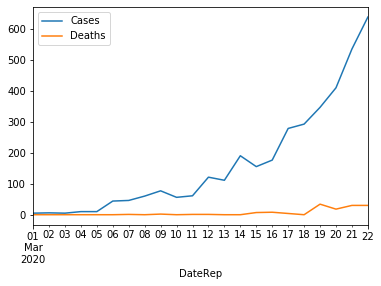

In [20]:
print(df_NL['2020-03'].sum())
df_NL['2020-03'].resample('D').mean().plot()